Afin de déterminer la source des différences de valorisations entre des entreprises françaises et américaines, on peut regarder l'impact de résultats internes à l'entreprises et de critères relatifs à l'analyse par le marché 

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
chemin_fichier = '../Nettoyage des données/df_SP500_clean.csv'
df_sp500_clean = pd.read_csv(chemin_fichier)
df_sp500_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [16]:
chemin_fichier2 = '../Nettoyage des données/df_Eurostoxx_clean.csv'
df_eurostoxx_clean = pd.read_csv(chemin_fichier2)
df_eurostoxx_clean.head() 

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [17]:
print(f"Nombre d'observations S&P 500 : {len(df_sp500_clean)}")
print(f"Nombre d'observations Eurostoxx : {len(df_eurostoxx_clean)}")

Nombre d'observations S&P 500 : 1501
Nombre d'observations Eurostoxx : 1207


Il convient de créer un nouveau data frame contenant toutes les informations pour mener la régressions linéaires

In [18]:
df_analyse = pd.concat([df_sp500_clean,df_eurostoxx_clean], ignore_index = True)
df_analyse.head()


,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [19]:
print(f"Nombre d'observations S&P 500 : {len(df_analyse)}")

Nombre d'observations S&P 500 : 2708


Les informations des deux data frame ont bien été récuperées dans df_analyse. Pour commencer la régression linéaire, on va determiner l'impact de la dummy variable est_US qui vaut 1 si la zone de l'entreprise est US, en faisant une régression simple. 

In [20]:
df_analyse['Est_US'] = np.where(df_analyse['Zone'] == 'USA', 1, 0)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %),Est_US
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN,1
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382,1
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990,1
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270,1
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN,1


Maintenant que la variable Est_US a bien été définie on peut procéder à la définition du modèle 

In [21]:
import statsmodels.formula.api as smf

# 1. Définir la formule du modèle
modele_formule_simple = """
PER_calcule ~ Est_US
"""

# 2. Nettoyage minimal : supprimer les NaN uniquement sur les variables utilisées
# Crée un sous-ensemble propre pour cette régression simple
df_simple_reg = df_analyse.dropna(subset=['PER_calcule', 'Est_US']).copy()

# 3. Ajustement (fitting) du modèle
try:
    modele_simple = smf.ols(formula=modele_formule_simple, data=df_simple_reg).fit()
    
    # 4. Affichage des résultats
    print("\n--- Résultat de la Régression Simple (Écart Brut) ---")
    print(modele_simple.summary())

except Exception as e:
    # Cette erreur ne devrait plus apparaître si la formule est définie
    print(f"Une erreur s'est produite lors de l'ajustement du modèle : {e}")


--- Résultat de la Régression Simple (Écart Brut) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     146.0
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           8.80e-33
Time:                        10:14:46   Log-Likelihood:                -10181.
No. Observations:                2708   AIC:                         2.037e+04
Df Residuals:                    2706   BIC:                         2.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

On remarque que le R^2 de la régression est d'environ 5.1%, ce qui est très faible.
De plus, le coefficient associé à la variable binaire Est_US est égal à 4.8548, ce qui signifie que le PER moyen des entreprises du S&P500 est en moyenne supérieur de 4.8548 par rapport au PER des entreprises de l'Eurostoxx. On remarque que la p-valeur vaut 0 ce qui permet de conclure que le modèle est globalement significatif. 

On peut également ajouter d'autres élements à la régressions linéaires, commençons par des données opérationnelles liées à l'activité de l'entreprise. On ne considérera pas la croissance l'EPS car les lignes pour 2021 contiennent des NA et ne seraient pas considerées dans la regression 

In [22]:
# --- Préparation du DataFrame pour le modèle multiple (SANS Croissance EPS - pour éviter d'affaiblir la base de données) ---

# 1. Copie du DataFrame utilisé pour la première régression linéaire 
df_reg_final = df_analyse.copy()

# 2. Convertir les pourcentages en décimaux pour la régression

df_reg_final["%MargeNette"] = df_reg_final["%MargeNette"] / 100
df_reg_final["%PayOut"] = df_reg_final["%PayOut"] / 100
df_reg_final["%Gearing"] = df_reg_final["%Gearing"] / 100


# 3. Définir la liste complète des colonnes à vérifier pour les NaN
colonnes_reg_finales = [
    'PER_calcule', 'Est_US', 'ROE_calcule', 'Beta', 
    '%Gearing', 'MarketCapitalizationBN', 
    '%MargeNette', '%PayOut'
]

# 4. Supprimer les lignes où une variable essentielle pour ce modèle est manquante
df_reg_final.dropna(subset=colonnes_reg_finales, inplace=True)

print(f"\nDataFrame prêt pour le modèle complet : {len(df_reg_final)} observations restantes après nettoyage.")


DataFrame prêt pour le modèle complet : 2708 observations restantes après nettoyage.


In [23]:
modele_formule_complet_final = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%Gearing") + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final = smf.ols(formula=modele_formule_complet_final, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple (Écart Net SANS Croissance EPS) ---")
print(modele_complet_final.summary())


--- Résultat de la Régression Multiple (Écart Net SANS Croissance EPS) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     34.15
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           7.02e-46
Time:                        10:14:46   Log-Likelihood:                -10137.
No. Observations:                2708   AIC:                         2.029e+04
Df Residuals:                    2700   BIC:                         2.034e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Le R^2 de la régression est encore faible, ce qui indique que les données étudiées ne permettent d'expliquer que 7% de la variation du PER. 
On remarque une augmentation du coefficient associé à la variable Est_US par rapport à la regression linéaire simple. 
Le ROE et le gearing sont significatifs à 10 et 5% respectivement contrairement aux autres variables qui sont significatives à 1%. 
On note également un problème de multicolinéarité potentiel

In [24]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives

# Calcul de la matrice de corrélation
matrice_corr = df_reg_final[colonnes_reg_finales].corr()
print(matrice_corr)



                        PER_calcule    Est_US  ROE_calcule      Beta  \
PER_calcule                1.000000  0.226277     0.010638  0.125869   
Est_US                     0.226277  1.000000     0.013532  0.229388   
ROE_calcule                0.010638  0.013532     1.000000  0.008171   
Beta                       0.125869  0.229388     0.008171  1.000000   
%Gearing                   0.004219 -0.009031     0.877739 -0.003248   
MarketCapitalizationBN     0.059155  0.074178     0.033633  0.029292   
%MargeNette               -0.117976  0.002991     0.017555  0.065223   
%PayOut                    0.056775 -0.086266     0.011514 -0.106353   

                        %Gearing  MarketCapitalizationBN  %MargeNette  \
PER_calcule             0.004219                0.059155    -0.117976   
Est_US                 -0.009031                0.074178     0.002991   
ROE_calcule             0.877739                0.033633     0.017555   
Beta                   -0.003248                0.029292   

On peut utiliser seaborn pour une meilleure visibilité des corrélations

<Axes: >

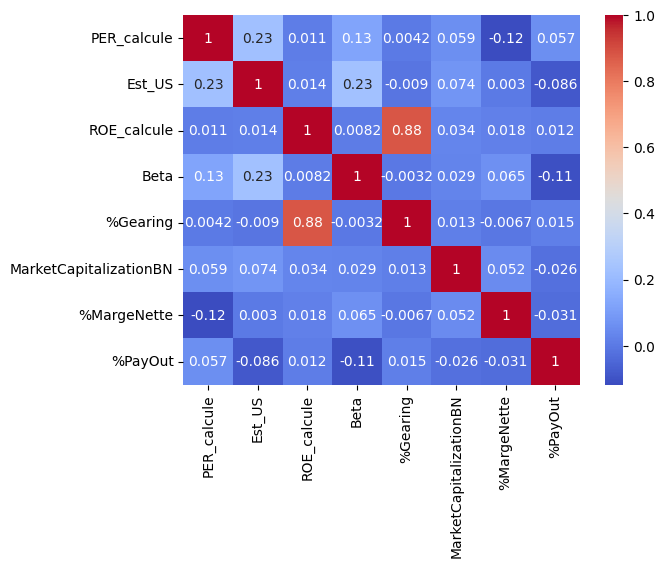

In [25]:
import seaborn as sns
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm')

On remarque que le ROE_calcule et le Gearing sont fortement corrélés. On choisit de retirer le Gearing plutôt que le ROE qui est un indicateur de performance fondamental 

In [26]:
modele_formule_complet_final_2 = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final_2 = smf.ols(formula=modele_formule_complet_final_2, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple (Écart Net SANS Croissance EPS) ---")
print(modele_complet_final_2.summary())


--- Résultat de la Régression Multiple (Écart Net SANS Croissance EPS) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     39.85
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           1.09e-46
Time:                        10:14:47   Log-Likelihood:                -10137.
No. Observations:                2708   AIC:                         2.029e+04
Df Residuals:                    2701   BIC:                         2.033e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

On remarque que le R^2 reste identique, le coefficient lié à la marge nette est négatif ce qui est contre intuitif : une marge nette plus élevée devrait avoir un impact positif sur le PER.
On peut remplacer la capitalisation boursière par d'autres données de marché en utilisant le data frame Damodaran 

In [27]:
#Chargement du df_damodaran
chemin_damodaran = "/Users/nourlyntekaya/Documents/GitHub/Projet-Python---The-Transatlantic-valuation-guide/Collecte de données/country_risk_premiums.csv"
df_damodaran = pd.read_csv(chemin_damodaran, sep=',')

#Affichons tous les Pays du data frame Damodaran 
print("\nListe des pays dans le data frame Damodaran:")
print(df_damodaran['Country'].unique())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nourlyntekaya/Documents/GitHub/Projet-Python---The-Transatlantic-valuation-guide/Collecte de données/country_risk_premiums.csv'

In [ ]:
print(df_analyse['Country'].unique())

['United States' 'Bermuda' 'Ireland' 'Switzerland' 'United Kingdom'
 'Canada' 'Netherlands' 'Singapore' 'Germany' 'Italy' 'Sweden' 'Belgium'
 'France' 'Spain' 'Austria' 'Luxembourg' 'Poland' 'China' 'Finland'
 'Norway' 'Denmark' 'Mexico']


In [ ]:
# --- Étape 1 : Nettoyage des noms de pays dans les deux DataFrames ---

# Nettoyage de votre DataFrame d'analyse (df_reg_final est le dernier que nous avons utilisé)
df_reg_final['Country'] = df_reg_final['Country'].str.strip()

# Nettoyage du DataFrame Damodaran
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

# Sélection des colonnes pertinentes
colonnes_marche = ['Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate']
df_damodaran = df_damodaran[colonnes_marche]

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_64893/1940852778.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul


In [ ]:
# --- Étape 2 : Jointure et Nettoyage des NaN ---

# df_reg_final est votre DataFrame d'analyse nettoyé des fondamentaux
# df_damodaran est votre DataFrame Damodaran nettoyé et indexé par 'Country'

df_fusion = pd.merge(
    df_reg_final, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)

# Nous allons nettoyer les lignes où la Prime de Risque Pays ou le Taux d'Impôt sont manquants après la jointure
df_fusion.dropna(subset=['Country Risk Premium', 'Corporate Tax Rate'], inplace=True)

print(f"\nDataFrame après jointure et nettoyage des pays non trouvés : {len(df_fusion)} observations.")

# --- Étape 3 : Lancement de la Régression Macro-Financière ---

import statsmodels.formula.api as smf

# Remplacement de MarketCapitalizationBN par les facteurs macroéconomiques
modele_formule_macro = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium") + 
              Q("Corporate Tax Rate")+
              Q("Equity Risk Premium")
"""

modele_macro = smf.ols(formula=modele_formule_macro, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro.summary())


DataFrame après jointure et nettoyage des pays non trouvés : 1501 observations.

--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     18.56
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           6.68e-21
Time:                        17:25:29   Log-Likelihood:                -5599.3
No. Observations:                1501   AIC:                         1.121e+04
Df Residuals:                    1494   BIC:                         1.125e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|

In [ ]:
df_fusion.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %),Est_US,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,0.776,0.407757,0.191486,0.506402,0.194975,NaN,1,4.33,0.0,25.0
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.065,0.427283,0.183119,0.521960,0.254177,5.276382,1,4.33,0.0,25.0
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,0.911,0.461257,0.181472,0.467921,0.215877,0.715990,1,4.33,0.0,25.0
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,0.956,0.431039,0.198003,0.574771,0.215315,5.213270,1,4.33,0.0,25.0
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,0.910,22.065504,0.253096,2.614462,0.147967,NaN,1,4.33,0.0,25.0


On a encore un problème de multicolinéarité et le R^2 reste faible. On remarque encore une incohérence liée à l'impact négatif de la marge nette sur le PER. Toutefois on remarque 

In [ ]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives
colonnes_reg = [
    'Est_US', 
    'ROE_calcule', 
    'Beta', 
    '%MargeNette',
    '%PayOut',
    'Country Risk Premium',
    'Corporate Tax Rate',
    'Equity Risk Premium'
]
# Calcul de la matrice de corrélation
matrice_corr_2 = df_fusion[colonnes_reg].corr()
print(matrice_corr_2)


                      Est_US  ROE_calcule      Beta  %MargeNette   %PayOut  \
Est_US                   NaN          NaN       NaN          NaN       NaN   
ROE_calcule              NaN     1.000000  0.008327     0.024171  0.000927   
Beta                     NaN     0.008327  1.000000     0.102004 -0.275220   
%MargeNette              NaN     0.024171  0.102004     1.000000 -0.002825   
%PayOut                  NaN     0.000927 -0.275220    -0.002825  1.000000   
Country Risk Premium     NaN    -0.013165  0.003166    -0.027970 -0.019724   
Corporate Tax Rate       NaN    -0.003014  0.013580     0.022508  0.024969   
Equity Risk Premium      NaN    -0.013165  0.003166    -0.027970 -0.019724   

                      Country Risk Premium  Corporate Tax Rate  \
Est_US                                 NaN                 NaN   
ROE_calcule                      -0.013165           -0.003014   
Beta                              0.003166            0.013580   
%MargeNette                      

<Axes: >

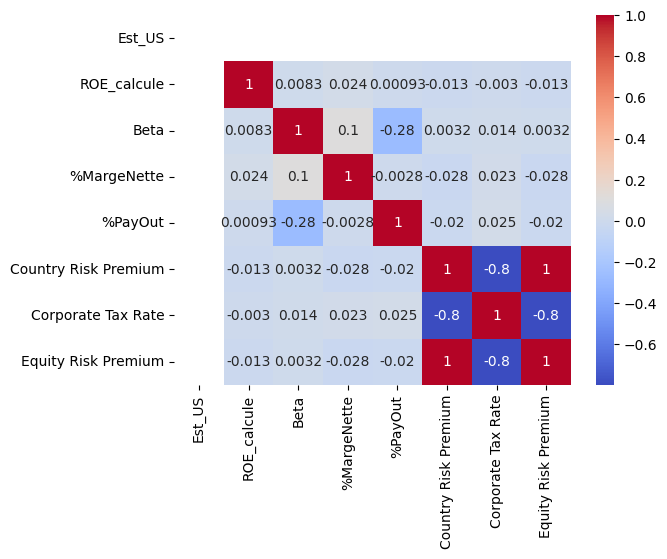

In [ ]:
sns.heatmap(matrice_corr_2, annot=True, cmap='coolwarm')

On remarque une forte corrélation entre Country Risk Premium, Equity Risk Premium et Corporate Tax. On peut encore ajouter la variable annual volume traded 

In [ ]:
print(df_fusion.columns)

Index(['Ticker', 'YahooTicker', 'Nom', 'Zone', 'AnneeFiscale', 'DateRapport',
       'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN',
       'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
       'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
       'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
       'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
       '%Gearing', '%PayOut', 'Croissance de l'EPS (en %)', 'Est_US',
       'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'],
      dtype='object')


Afin de choisir les variables de la régressions on va regarder la matrice de covariance entre toutes les variables du data frame 

In [ ]:
#On étudie la corrélation entre toutes les variables
colonnes_reg_exp = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', "Croissance de l'EPS (en %)", 'Est_US', 
    'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes_reg_exp].corr()


<Axes: >

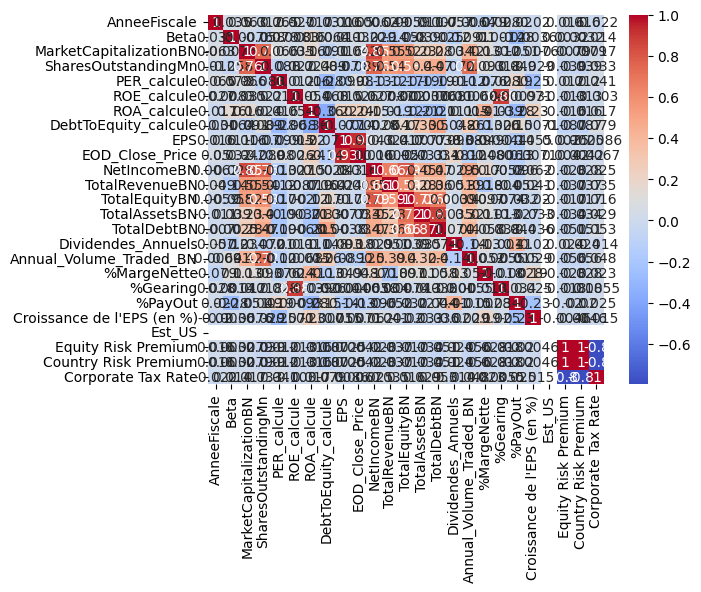

In [ ]:
sns.heatmap(matrice_corr_cols, annot=True, cmap='coolwarm')

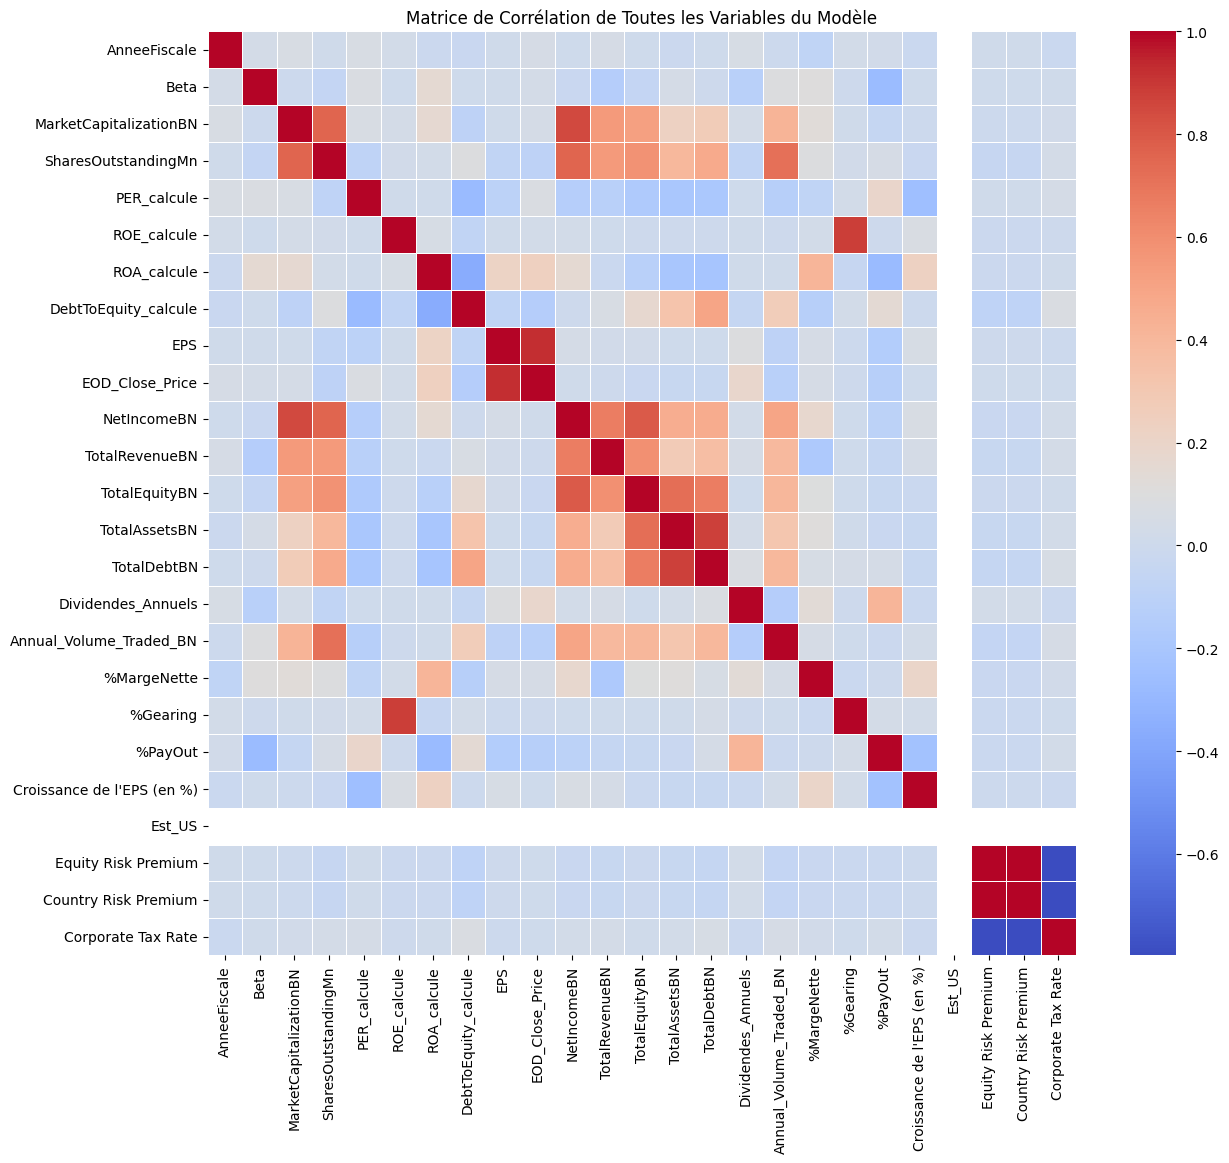

In [ ]:

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  # Réglez sur True si vous voulez les nombres, mais False rend le graphique plus clair
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

In [ ]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     25.26
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           9.01e-33
Time:                        17:25:30   Log-Likelihood:                -5569.3
No. Observations:                1501   AIC:                         1.115e+04
Df Residuals:                    1493   BIC:                         1.120e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN + 
              NetIncomeBN +
              TotalRevenueBN + 
              TotalEquityBN + 
              TotalAssetsBN + 
              TotalDebtBN + 
              EPS
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     28.88
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           6.84e-64
Time:                        17:30:24   Log-Likelihood:                -5484.3
No. Observations:                1501   AIC:                         1.100e+04
Df Residuals:                    1487   BIC:                         1.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------